In [20]:
import os
import tarfile
import gdown
import nibabel as nib
import matplotlib.pyplot as plt

# Paths
DATA_DIR = "/work/pi_pkatz_umass_edu/atif_experiments/segmentation/data"
RAW_DIR = os.path.join(DATA_DIR, "raw")
EXTRACTED_DIR = os.path.join(DATA_DIR, "extracted/Task02_Heart")
IMAGES_DIR = os.path.join(EXTRACTED_DIR, "imagesTr")
LABELS_DIR = os.path.join(EXTRACTED_DIR, "labelsTr")

GOOGLE_DRIVE_LINK = "https://drive.google.com/uc?id=1wEB2I6S6tQBVEPxir8cA5kFB8gTQadYY"
TAR_FILE = os.path.join(RAW_DIR, "dataset.tar")


In [25]:
def download_tar_file(gdrive_link, output_path):
    """Download tar file from Google Drive."""
    if not os.path.exists(output_path):
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        print("Downloading dataset...")
        gdown.download(gdrive_link, output_path, quiet=False)
        print(f"Downloaded dataset to {output_path}")
    else:
        print(f"Dataset already downloaded at {output_path}")


def extract_tar_files(tar_path, extract_to):
    """Extract tar files to the specified directory."""
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)
    with tarfile.open(tar_path, "r") as tar:
        tar.extractall(path=extract_to)
    print(f"Extracted tar file to {extract_to}")


def visualize_3d_volume(file_path, num_slices=5):
    """Visualize a few slices of the 3D volumetric data."""
    volume = nib.load(file_path).get_fdata()  # Load the 3D volume as a NumPy array
    slices = volume.shape[-1]  # Number of slices along the Z-axis

    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    for i in range(num_slices):
        slice_idx = int(i * slices / num_slices)  # Evenly spaced slices
        axes[i].imshow(volume[:, :, slice_idx], cmap="gray")
        axes[i].set_title(f"Slice {slice_idx}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()


def process_dataset():
    """Main function to download, extract, and visualize dataset."""

    # Step 3: Visualize sample 3D volume
    sample_image = os.path.join(IMAGES_DIR, "la_021.nii.gz")
    sample_label = os.path.join(LABELS_DIR, "la_021.nii.gz")

    if os.path.exists(sample_image):
        print(f"Visualizing {sample_image}")
        visualize_3d_volume(sample_image)
    else:
        print(f"File not found: {sample_image}")

    if os.path.exists(sample_label):
        print(f"Visualizing {sample_label} (label)")
        visualize_3d_volume(sample_label)
    else:
        print(f"File not found: {sample_label}")


In [ ]:
# Step 1: Download the dataset
download_tar_file(GOOGLE_DRIVE_LINK, TAR_FILE)

# Step 2: Extract tar files
extract_tar_files(TAR_FILE, EXTRACTED_DIR)

Visualizing /work/pi_pkatz_umass_edu/atif_experiments/segmentation/data/extracted/Task02_Heart/imagesTr/la_021.nii.gz


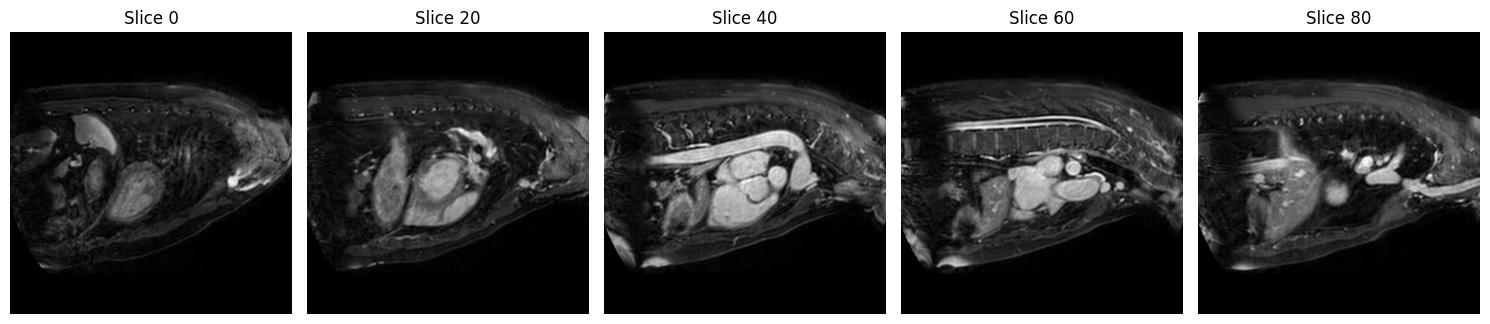

Visualizing /work/pi_pkatz_umass_edu/atif_experiments/segmentation/data/extracted/Task02_Heart/labelsTr/la_021.nii.gz (label)


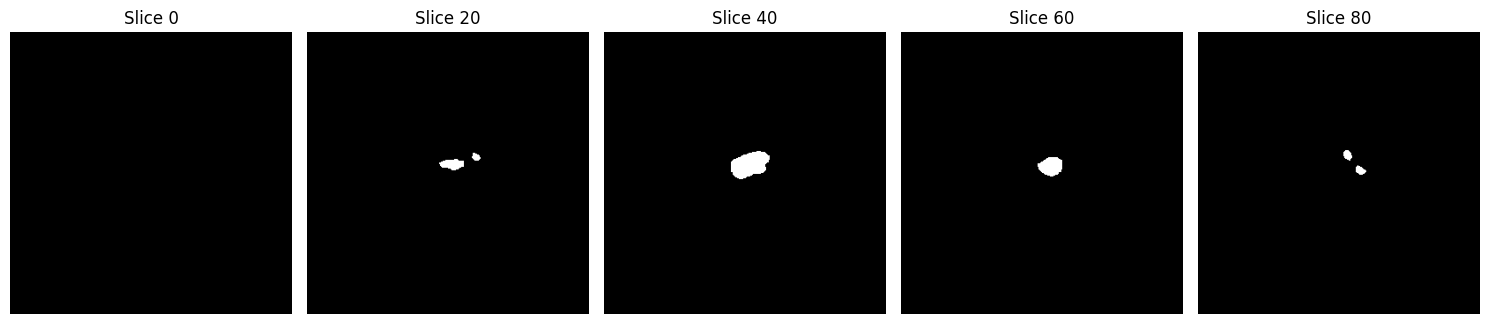

In [26]:
process_dataset()

In [ ]:
import torch

# Load the models
model_unet3d_path = "path_to_your/best_model_unet3d-2.pth"
model_unetr_path = "path_to_your/best_model_unetr-2.pth"

# Load state dictionaries
state_dict_unet3d = torch.load(model_unet3d_path, map_location='cpu')
state_dict_unetr = torch.load(model_unetr_path, map_location='cpu')

# Compare model keys (structure)
keys_unet3d = set(state_dict_unet3d.keys())
keys_unetr = set(state_dict_unetr.keys())
same_structure = keys_unet3d == keys_unetr

# Compare parameter shapes for models with the same structure
param_differences = []
if same_structure:
    for key in keys_unet3d:
        if state_dict_unet3d[key].shape != state_dict_unetr[key].shape:
            param_differences.append((key, state_dict_unet3d[key].shape, state_dict_unetr[key].shape))

# Results
if same_structure:
    print("The models have the same structure.")
    if not param_differences:
        print("All parameters have the same shapes. The models are identical.")
    else:
        print("The models have structural differences in the following parameters:")
        for diff in param_differences:
            print(f"Parameter: {diff[0]}, UNet3D shape: {diff[1]}, UNETR shape: {diff[2]}")
else:
    print("The models have different structures.")
